### NATURAL GAS PRICES - INFERENCES

#### HYPOTHESIS TESTING
There is one major major factor that affect natural gas prices in the United States of America. This can be developed in the form of hypothesis: Natural gas prices are mainly a function of market supply and demand. 

This hypothesis is premised on the thought that there are limited short-term alternatives to natural gas as a fuel for heating and electricity generation during peak demand periods, changes in supply or demand over a short period may result in large price changes. Prices themselves often act to balance supply and demand.

* Supply-Side Factors:  These include natural gas production, net imports, and underground storage levels. Increases in supply tend to pull prices down, while decreases in supply tend to push prices up. Increases in prices tend to encourage production, imports, and sales from storage inventories. Declining prices tend to have the opposite effects.

* Demand-Side Factors: Factors on the demand-side include weather (temperatures), economic conditions, and petroleum prices. Cold weather (low temperatures) increases demand for heating, while hot weather (high temperatures) increases demand for cooling, which increases natural gas demand by electric power plants. Economic conditions influence demand for natural gas, especially by manufacturers. Demand may be moderated by petroleum fuel prices, which may be an economical substitute for natural gas for power generators, manufacturers, and large building owners. Higher demand tends to lead to higher prices, while lower demand can lead to lower prices. Increases and decreases in prices tend to reduce or increase demand.

##### THE INFLUENCE OF WEATHER ON NATURAL GAS PRICES
In order to investigate the impact of weather on natural gas prices, we will first create two groups: The group that incorporates prices in the winter & summer (Expected High Demand Period) and the group that incorporates prices in the spring and fall (and Expected Low Demand Period). The winter & summer group are tagged (1) in weather-status variable (WSTAT) while the fall & spring group is labelled (0) in weather-status column.

We will first load the data set and then generate a scatter plot to investigate whether there are observed differences between the two groups.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Load data for analysis
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH


In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [6]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

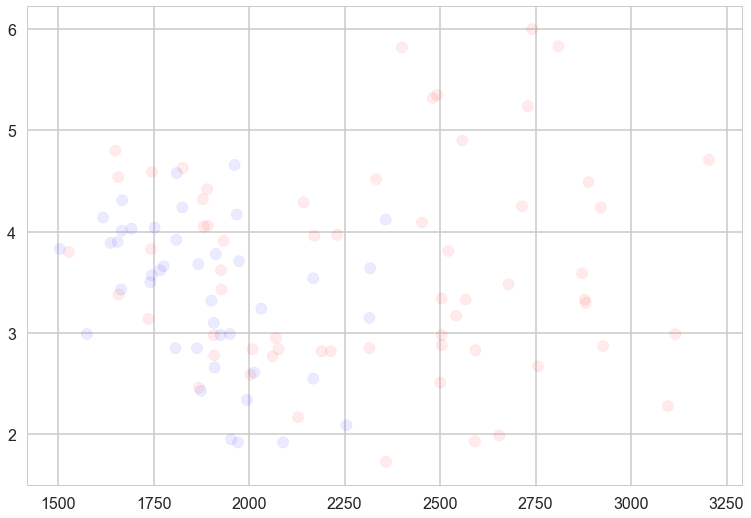

In [20]:
#Scatter plot of GasPrice vs TotGasCons
plt.scatter(df.TotGasCons, df.GasPrice, c=[cm_bright.colors[i] for i in df.WSTAT == 0], alpha=0.08);

The scatter plot above (Gas price vs Total Gas consumption) shows that gas price has always fallen within the $1/MMbtu and $5/MMbtu. Higher gas prices > $5/MMbtu were accompanied with higher demand (higher total consumption) of Natural Gas (>2.5 Bscf). From the scatter plot, it could be observed that during spring and fall, the price of gas falls within the normal range of  period  of low gas price $1/MMbtu and $5/MMbtu, while the period of high price (>$5), are during the winter and the summer. It is also evident that the period of spring and fall (blue shaded circles) are consistent with the period of low gas consumption while the winter and summer period are consistent with the time of high natural gas consumption.  

Now that we have established that there is an apparent difference between the two groups, we want to check whether it might be due to chance.

In [21]:
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

# seed the random number generator so we all get the same results
numpy.random.seed(19)

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

We split the data frame into two thereby creating two groups x1 and x2 comprising data for (spring & fall) and (winter & summer)  respectively. 

In [39]:
gb = df.groupby('WSTAT')    
[x1,x2] = [gb.get_group(x) for x in gb.groups]
x1.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH
5,396,2009-05-31,36.90,59.03,2190.437,1504.000,3.83,SPRING,0,HIGH
9,518,2009-09-30,40.23,69.41,2089.220,1574.975,2.99,FALL,0,LOW
10,549,2009-10-31,39.33,75.72,2197.157,1666.520,4.01,FALL,0,HIGH
11,579,2009-11-30,38.73,77.99,2144.157,1776.171,3.66,FALL,0,HIGH


##### TEST STATISTIC
We'll look at the gas price and total gas consumed. The effect size we'll consider is the difference in the means. Later we will look at a correlation between variables or a coefficient in a linear regression. The number that quantifies the size of the effect is called the "test statistic".

In [42]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

Let us extract the gas price for the winter & summer group and those for the spring & fall group. The results are pandas Series objects.

In [43]:
group1 = x1['GasPrice']
group2 = x2['GasPrice']

In [44]:
actual = TestStatistic((group1, group2))
actual

0.256351766513057

The actual difference in the means is 26 cent per MMbtu.

#### NULL HYPOTHESIS
The null hypothesis is that there is no difference between the groups. We can model that by forming a pooled sample that includes gas prices in all the weathers.

In [45]:
n, m = len(group1), len(group2)
pool = numpy.hstack((group1, group2))

Then we can simulate the null hypothesis by shuffling the pool and dividing it into two groups, using the same sizes as the actual sample.

In [46]:
def RunModel():
    numpy.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

The result of running the model is two NumPy arrays with the shuffled Gas Prices:

In [47]:
RunModel()

(array([ 4.42,  2.99,  2.43,  3.32,  2.99,  2.59,  1.73,  3.3 ,  2.83,
         2.51,  3.43,  2.88,  4.06,  3.57,  2.67,  4.71,  2.61,  3.78,
         2.98,  2.77,  2.28,  3.24,  4.17,  3.14,  3.38,  2.99,  2.85,
         3.17,  3.43,  4.09,  3.34,  4.14,  2.46,  5.24,  2.34,  2.98,
         6.  ,  2.98,  3.83,  3.89,  3.64,  3.97]),
 array([ 3.8 ,  4.01,  4.04,  4.58,  4.52,  5.82,  3.68,  1.93,  3.33,
         2.82,  2.84,  4.24,  3.15,  3.5 ,  4.59,  1.92,  4.12,  4.31,
         3.91,  4.05,  3.92,  5.32,  4.66,  2.85,  3.96,  3.48,  3.9 ,
         4.63,  2.95,  5.35,  2.66,  2.84,  4.54,  4.32,  4.49,  1.92,
         4.8 ,  2.82,  3.66,  3.81,  3.62,  3.71,  3.33,  2.78,  4.9 ,
         1.95,  2.55,  5.83,  2.87,  4.24,  4.03,  2.09,  3.62,  4.25,
         2.17,  2.85,  3.83,  4.29,  3.54,  3.1 ,  3.59,  1.99]))

Then we compute the same test statistic using the simulated data:

In [48]:
TestStatistic(RunModel())

0.1816666666666662

If we run the model 1000 times and compute the test statistic, we can see how much the test statistic varies under the null hypothesis.

In [49]:
test_stats = numpy.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000,)

Here's the sampling distribution of the test statistic under the null hypothesis, with the actual difference in means indicated by a gray line.

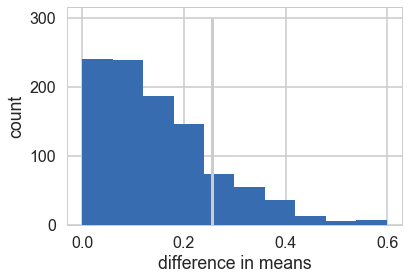

In [50]:
pyplot.vlines(actual, 0, 300, linewidth=3, color='0.8')
pyplot.hist(test_stats, color=COLOR5)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
None

The p-value is the probability that the test statistic under the null hypothesis exceeds the actual value.

In [51]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

0.16800000000000001

In this case the result is about 17%, which means that even if there is no difference between the groups, it is plausible that we could see a sample difference as big as 26 cents.

We conclude that the apparent effect might be due to chance, so we are not confident that it would appear in the general population, or in another sample from the same population.

### INVESTIGATING DIFFERENCES IN GAS DEMAND
Let us organize all our codes in a class that represents the structure of a hypothesis test.

In [52]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = numpy.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = pyplot.hist(ht.test_stats, color=COLOR4)
        pyplot.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        pyplot.xlabel('test statistic')
        pyplot.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

HypothesisTest is an abstract parent class that encodes the template. Child classes fill in the missing methods. 

In [53]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Now we can run the test by instantiating a DiffMeansPermute object:

In [55]:
data = (x1.GasPrice, x2.GasPrice)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute gas price')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute gas price
p-value = 0.158
actual = 0.256351766513057
ts max = 0.636167434716


And we can plot the sampling distribution of the test statistic under the null hypothesis.

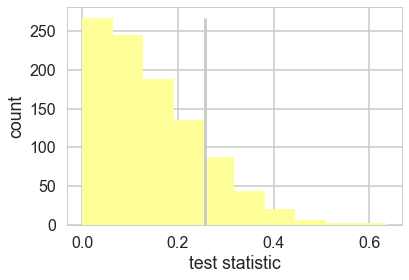

In [56]:
ht.PlotHist()

#### Difference in standard deviation
We write a class named DiffStdPermute that extends DiffMeansPermute and overrides TestStatistic to compute the difference in standard deviations. We will then investigate whether the difference in standard deviations statistically significant.

In [57]:
# Solution goes here

class DiffStdPermute(DiffMeansPermute):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.std() - group2.std())
        return test_stat

In [58]:
data = (x1.GasPrice, x2.GasPrice)
ht = DiffStdPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute gas price')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute gas price
p-value = 0.023
actual = 0.2725119140128075
ts max = 0.389916550583


### Difference in Gas Demand
Now let's run DiffMeansPermute again to see if there is a difference in Gas Demand between the different weather classes.

In [60]:
data = (x1.TotGasCons, x2.TotGasCons)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute Total gas Consumption')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute Total gas Consumption
p-value = 0.0
actual = 432.10397465437995
ts max = 262.99040937


In this case, after 1000 attempts, we never see a sample difference as big as the observed difference, so we conclude that the apparent effect is unlikely under the null hypothesis. Under normal circumstances, we can also make the inference that the apparent effect is unlikely to be caused by random sampling. In this case, the p-value is less than 1/1000 or less than 0.001 as the apparent effect is not impossible under the null hypothesis; just unlikely.